# Polynomial ODE to transcriptional network examples

## Sine-cosine oscillator

*Note:* The typical sine-cosine oscillator is $x' = y$ and $y' = -x$, which takes on negative values. Since transcriptional factor concentrations are nonnegative, we "shift" the oscillator up using $x' = y-2$ and $y' = -x+2$ so that both variables stay positive.

x_t' = 

x_b*y_t/y_b - 2*x_t + x_t/x_b

x_b' = 

2*x_b**2/x_t - 2*x_b + 1

y_t' = 

2*y_b - 2*y_t + y_t/y_b

y_b' = 

-2*y_b + 1 + x_t*y_b**2/(x_b*y_t)

tn_inits={x_t: 2, x_b: 1, y_t: 1, y_b: 1}
tn_ratios={x: x_t/x_b, y: y_t/y_b}


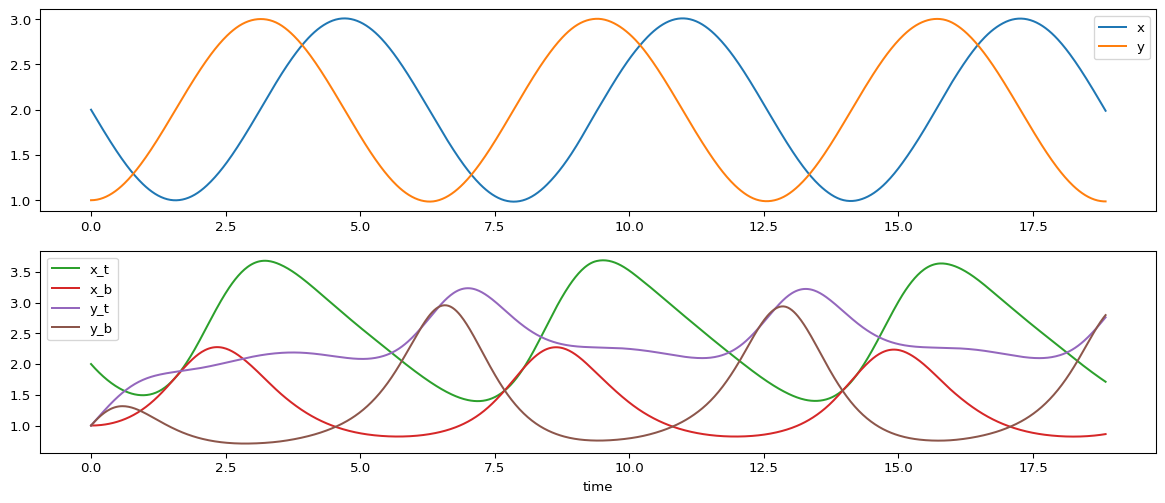

In [1]:
from math import pi
import numpy as np
import sympy as sp
from transform import plot_tn, ode2tn

xt,xb,yt,yb = sp.symbols('x_t x_b y_t y_b')
x,y = sp.symbols('x y')
odes = {
    x: y-2,
    y: -x+2,
}
inits = {
    x: 2,
    y: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma, beta)
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(expr)
print(f'{tn_inits=}')
print(f'{tn_ratios=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma, beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x,y], [xt,xb,yt,yb]])

x_t' = x_b*y_t/y_b - 2*x_t + x_t/x_b
x_b' = 2*x_b**2/x_t - 2*x_b + 1
y_t' = 2*y_b - 2*y_t + y_t/y_b
y_b' = -2*y_b + 1 + x_t*y_b**2/(x_b*y_t)
tn_inits={x_t: 2, x_b: 1, y_t: 1, y_b: 1}
tn_ratios={x: x_t/x_b, y: y_t/y_b}
times = [0.         1.57079633 3.14159265 4.71238898 6.28318531]
x_y = [2.         1.78280757 3.67207594 2.80592514 1.71859172]
x_b = [1.         1.78425369 1.83663725 0.93260227 0.859926  ]
y_t = [1.         1.87324904 2.14156469 2.10338162 2.74383426]
y_b = [1.         0.93637933 0.71348949 1.05261915 2.78279691]


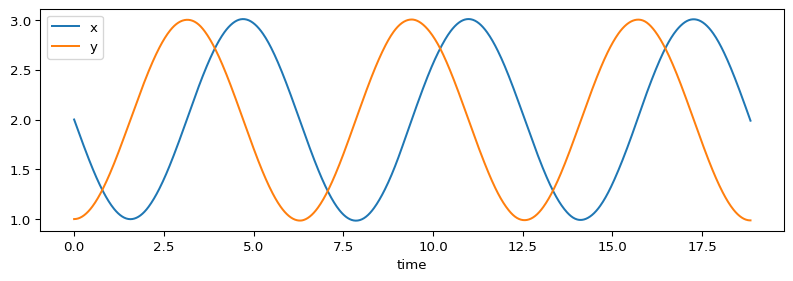

In [21]:
# simplified cell for example in README
from math import pi
import numpy as np
import sympy as sp
import gpac as gp
from transform import plot_tn, ode2tn

x,y = sp.symbols('x y')
odes = { # odes dict maps each symbol to an expression for its time derivative
    x: y-2,
    y: -x+2,
}
inits = { # inits maps each symbol to its initial value
    x: 2,
    y: 1,
}
gamma = 2 # uniform decay constant; should be set sufficiently large that ???
beta = 1 # constant introduced to keep values from going to infinity or 0
t_eval = np.linspace(0, 6*pi, 1000)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma, beta)
for sym, expr in tn_odes.items():
    print(f"{sym}' = {expr}")
print(f'{tn_inits=}')
print(f'{tn_ratios=}')

plot_tn(odes, inits, gamma, beta, t_eval=t_eval)

t_eval = np.linspace(0, 2*pi, 5)
sol = gp.integrate_odes(tn_odes, tn_inits, t_eval)
print(f'times = {sol.t}')
print(f'x_y = {sol.y[0]}')
print(f'x_b = {sol.y[1]}')
print(f'y_t = {sol.y[2]}')
print(f'y_b = {sol.y[3]}')

## ODEs that decay to 0

x_t' = 

-2*x_t + x_t/x_b

x_b' = 

1 - x_b

tn_inits={x_t: 1, x_b: 1}
tn_ratios={x: x_t/x_b}


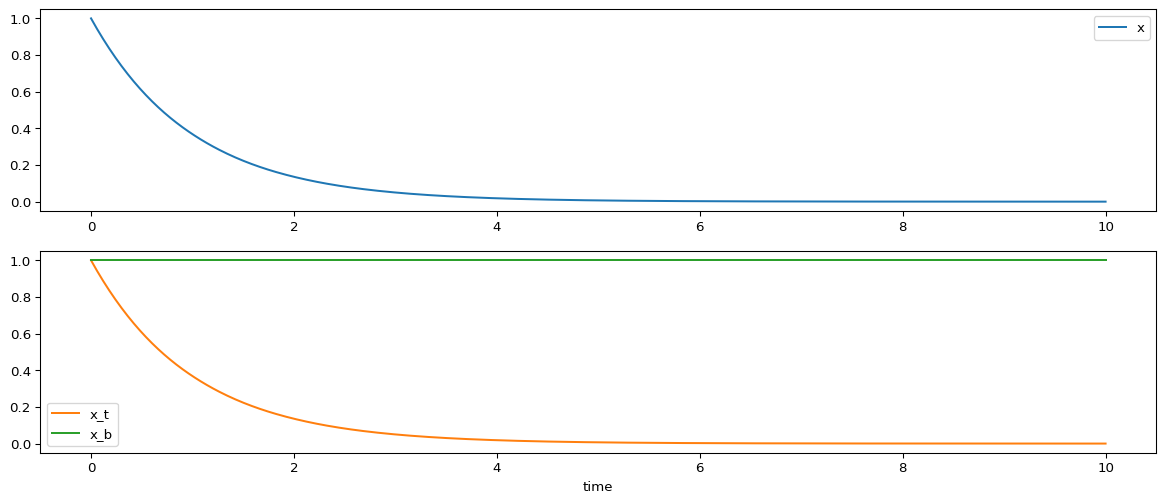

In [3]:
from math import pi
import numpy as np
import sympy
import gpac
from transform import plot_tn, ode2tn

xt,xb = sympy.symbols('x_t x_b')
x = sympy.symbols('x')
odes = {
    x: -x,
}
inits = {
    x: 1,
}
gamma = 2
beta = 1
t_eval = np.linspace(0, 10, 500)
tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma, beta)
from IPython.display import display
for sym, expr in tn_odes.items():
    print(f"{sym}' = ", end='')
    display(expr)
print(f'{tn_inits=}')
print(f'{tn_ratios=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma, beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x], [xt,xb]])
# import matplotlib.pyplot as plt
# plt.yscale('log')

## Schlögl system

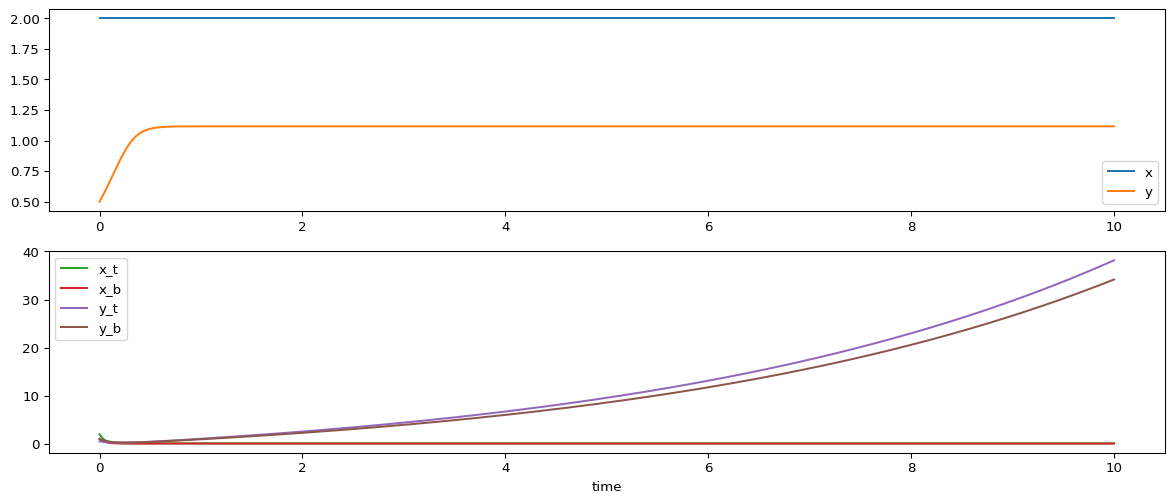

In [4]:
import gpac as gp
import numpy as np
import sympy as sp
from transform import plot_tn, ode2tn

x_sp, y_sp = gp.species('x y')
rxns = [
    x_sp >> x_sp+y_sp,
    (3*y_sp | 2*y_sp).k(11).r(16.5),
    (y_sp >> gp.empty).k(6.5),
]
odes = gp.crn_to_odes(rxns)
# extract symbols from odes
for var in odes.keys():
    if var.name == 'x':
        x = var
    if var.name == 'y':
        y = var
# for v,ode in odes.items():
#     print(f"{v}' = {ode}")
inits = {
    x: 2,
    y: 0.5,
}
gamma = 20
beta = 1
t_eval = np.linspace(0, 10, 500)

tn_odes, tn_inits, tn_ratios = ode2tn(odes, inits, gamma, beta)
for ratio_symbol in tn_inits.keys():
    if ratio_symbol.name == 'x_t':
        xt = ratio_symbol
    if ratio_symbol.name == 'x_b':
        xb = ratio_symbol
    if ratio_symbol.name == 'y_t':
        yt = ratio_symbol
    if ratio_symbol.name == 'y_b':
        yb = ratio_symbol
# from IPython.display import display
# for sym, expr in tn_odes.items():
#     print(f"{sym}' = ", end='')
#     display(expr)
# print(f'{tn_inits=}')
# print(f'{tn_ratios=}')
figsize = (15, 6)
plot_tn(odes, inits, gamma, beta, t_eval=t_eval, figure_size=figsize, symbols_to_plot=[[x,y], [xt,xb,yt,yb]])
# import matplotlib.pyplot as plt
# plt.yscale('log')
# gp.plot_crn(rxns, {x_sp: 2, y_sp: 1}, t_eval=t_eval, figure_size=figsize)

## Flip-flip from https://arxiv.org/pdf/1003.3275 (original ODEs)

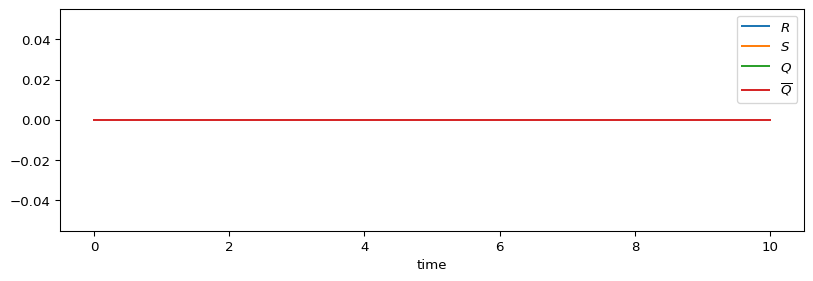

In [5]:
import gpac as gp
import numpy as np
import sympy as sp

def nor(a0: gp.Specie, a1: gp.Specie, b0:gp.Specie, b1:gp.Specie, c0: gp.Specie, c1: gp.Specie) -> list[gp.Reaction]:
    """C := A NOR B"""
    return [
        a0+b0+c0 >> a0+b0+c1,
        a0+b1+c1 >> a0+b1+c0,
        a1+b0+c1 >> a1+b0+c0,
        a1+b1+c1 >> a1+b1+c0,
    ]

def fanout(a0: gp.Specie, a1: gp.Specie, b0: gp.Specie, b1: gp.Specie, c0: gp.Specie, c1: gp.Specie) -> list[gp.Reaction]:
    """B := C := A"""
    return [
        a0+b1 >> a0+b0,
        a0+c1 >> a0+c0,
        a1+b0 >> a1+b1,
        a1+c0 >> a1+c1,
    ]

def amplifier(a0: gp.Specie, a1: gp.Specie, b0: gp.Specie, b1: gp.Specie) -> list[gp.Reaction]:
    """B := A"""
    return [
        2*b0+a1 >> 2*b0+a0,
        2*b1+a0 >> 2*b0+a1,
    ]

r_0,s_0,q_0,nq_0,w1_0,w2_0,r1_0,r2_0,f1_0,f2_0 = gp.species(r'$R^0$ $S^0$ $Q^0$ $\overline{Q}^0$ $W_1^0$ $W_2^0$ $R_1^0$ $R_2^0$ $F_1^0$ $F_2^0$')
r_1,s_1,q_1,nq_1,w1_1,w2_1,r1_1,r2_1,f1_1,f2_1 = gp.species(r'$R^1$ $S^1$ $Q^1$ $\overline{Q}^1$ $W_1^1$ $W_2^1$ $R_1^1$ $R_2^1$ $F_1^1$ $F_2^1$')
rxns = (
    nor(r_0, r_1, f1_0, f1_1, w1_0, w1_1) + 
    nor(s_0, s_1, f2_0, f2_1, w2_0, w2_1) + 
    fanout(w1_0, w1_1,  q_0,  q_1, r1_0, r1_1) +
    fanout(w2_0, w2_1, nq_0, nq_1, r2_0, r2_1) +
    amplifier(r2_0, r2_1, f1_0, f1_1) +
    amplifier(r1_0, r1_1, f2_0, f2_1)
)
inits = {
    r_0: 1,
    s_0: 1,
    q_0: 1,
    nq_0: 1,
    w1_0: 1,
    w2_0: 1,
    r1_0: 1,
    r2_0: 1,
    f1_0: 1,
    f2_0: 1,
}
r,s,q,nq, sr_0,sr_1,ss_0,ss_1,sq_0,sq_1,snq_0,snq_1 = sp.symbols(r'$R$ $S$ $Q$ $\overline{Q}$ $R^0$ $S^0$ $Q^0$ $\overline{Q}^0$ $R^1$ $S^1$ $Q^1$ $\overline{Q}^1$')
dependent_symbols = {
    r: sr_1 - sr_0,
    s: ss_1 - ss_0,
    q: sq_1 - sq_0,
    nq: snq_1 - snq_0,
}
t_eval = np.linspace(0, 10, 200)
gp.plot_crn(rxns, inits, t_eval, dependent_symbols=dependent_symbols, symbols_to_plot=['$R$', '$S$', '$Q$', r'$\overline{Q}$'])